## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import subprocess
import os

from collections import Counter

%matplotlib inline

In [2]:
codontable_standard = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    }


ambiguous_nt_dict = {'R':['A','G'], 'N':['A', 'T', 'G', 'C'], 'Y':['C', 'T'], 'W':['A', 'T'], 
                     'S':['C','G'], 'M':['A', 'C'], 'K':['G', 'T']}


def translate(codon):
    
    if len([x for x in codon if x in ['R', 'N', 'Y', 'W', 'S', 'M', 'K']]) == 0:
    
        return codontable_standard[codon]
    
    elif len([x for x in codon if x in ['R', 'N', 'Y', 'W', 'S', 'M', 'K']]) == 1:
        
        possible_codons = []
        
        for nt in codon:
            
            if nt in ambiguous_nt_dict.keys():
                
                for pos in ambiguous_nt_dict[nt]:
                    
                    alter_codon = codon.replace(nt, pos)
                    
                    possible_codons.append(alter_codon)
        
        possible_aa =  []
        
        for pos_c in possible_codons:
            
            possible_aa.append(codontable_standard[pos_c])
        
        if len(set(possible_aa)) == 1:
            
            return possible_aa[0]
        
        else:
        
        
            return 'X'
    else:
        return 'X'

def prot_translation(cds, stop_detect=False):
   
    seq_len = len(cds)
    prot_seq = ''
    
    
    for x in range(0, ((seq_len/3))):
        codon = cds[(x*3):((x*3)+3)]      
        aa_res = translate(codon)
        prot_seq += aa_res

        if stop_detect == True:

            if aa_res == '*':

                return prot_seq
                
    # if nucleotide call is ambigous, check id codon can still be called        

        
    return prot_seq


def get_dict_of_seq(orf):
    
    orf_fasta_dict = {}
    
    fasta_file_name = './allReferenceGenesWithSNPsAndIndelsInferred/'+ orf + '.fasta'
    
    with open(fasta_file_name, 'r') as orf_fasta:
    
        for line in orf_fasta:

            if line.startswith('>') == True:
                
                
                orf_info = line.strip('>').split('\t')[0]
                


                orf_fasta_dict[orf_info] = ''

            else:

                orf_fasta_dict[orf_info] += line.strip('\n')
                
    return orf_fasta_dict

/data/Dropbox/1002_yeast_project


In [4]:
s288c_orfs = '../make_gRNA_library/orf_coding_all_R64-1-1_20110203.fasta'


orf_dict ={}

with open(s288c_orfs, 'r') as orf_fasta:
    
    for line in orf_fasta:
        
        if line.startswith('>') == True:
            
            orf_info = line.split(' ')
            orf_name = orf_info[0].strip('>')

            
            orf_dict[orf_name] = ''
            
        else:
        
            orf_dict[orf_name] += line.strip('\n')
            
print orf_dict['YOR168W']

ATGTCTTCTGTAGAAGAATTGACTCAGCTGTTTTCACAGGTTGGGTTTGAAGATAAAAAGGTGAAGGAGATTGTCAAGAATAAAAAGGTTTCTGATTCACTTTACAAATTGATTAAGGAGACTCCTTCGGACTATCAATGGAACAAATCTACTAGAGCGCTAGTACACAACCTGGCATCTTTTGTCAAAGGTACAGATCTACCCAAGTCTGAATTAATTGTTAACGGCATCATTAATGGTGATTTGAAGACATCTCTGCAAGTCGATGCCGCATTTAAATATGTAAAGGCTAATGGCGAGGCATCCACCAAAATGGGTATGAATGAAAACTCTGGTGTTGGTATTGAGATTACAGAGGATCAGGTTAGAAATTACGTCATGCAGTACATTCAAGAAAACAAGGAAAGAATTTTAACTGAACGCTATAAACTGGTGCCAGGTATTTTTGCCGATGTTAAAAACTTAAAGGAGCTGAAGTGGGCCGATCCACGTAGTTTCAAGCCAATTATCGACCAAGAAGTCTTAAAACTTTTGGGTCCAAAGGATGAGAGAGACTTAATCAAGAAGAAGACCAAGAATAATGAAAAGAAGAAAACCAATTCTGCCAAGAAGAGTTCTGATAATTCTGCATCATCCGGTCCAAAGAGGACTATGTTCAATGAAGGTTTCCTAGGTGATTTGCATAAAGTGGGTGAAAACCCACAAGCTTACCCAGAATTAATGAAGGAACACCTTGAGGTTACTGGTGGCAAAGTTCGTACAAGGTTCCCTCCGGAGCCCAATGGATATTTGCATATTGGTCATTCTAAAGCTATTATGGTTAATTTTGGCTATGCTAAATATCACAATGGTACCTGTTATTTAAGATTTGACGATACCAACCCCGAAAAGGAAGCTCCTGAATATTTTGAATCCATTAAGAGAATGGTTTCTTGGTTAGGTTTTAAACCATGGAAAATTACTTACTCAAGTGATTATTTTGACGAGCTTTATCGCCTCG

In [5]:
#os.chdir('../')

In [6]:
def fasta_orf_variants_on_S288c(orf):
    
    os.chdir('./temp/')
    
    temp_fasta = './'+orf+'.fasta'
    
    with open(temp_fasta, 'w') as prot_fasta:
        
        header = '>'+orf+'\n'
        
        prot_fasta.write(header)
        
        seq = prot_translation(orf_dict[orf]) +'\n'
        
        prot_fasta.write(seq)
    
    
    make_db_call = 'makeblastdb -in '+temp_fasta+' -dbtype prot -out ' +temp_fasta+'.db'
    
    subprocess.check_output(make_db_call, shell = True)
    
    all_strain_fasta_path = '../allReferenceGenesWithSNPsAndIndelsInferred/'+orf+'.fasta'
    
    
    blast_out = '../blast_out/'+orf+'.fasta_out'
    
    blast_call = 'fastx36  -p -s VT10 -T 6 -m 10 -n -3 '
    
    blast_call += all_strain_fasta_path + ' \"' + temp_fasta +'.db 12\" > '+ blast_out
    
       
    #print blast_call

    subprocess.check_output(blast_call, shell = True)
    
    #cleanup_call = 'rm ' + orf + '.*'
    
    #subprocess.check_output(cleanup_call, shell = True)
        
    os.chdir('../')
    
    return


fasta_orf_variants_on_S288c('YNL216W')

print os.getcwd()

/data/Dropbox/1002_yeast_project


In [7]:
def parse_FASTA_output(orf):
    
    strain_seqs_dict = {}
    
    seq_counter = 1
    
    
    with open(('./blast_out/'+orf+'.fasta_out')) as alignment:
        
        current_strain = ''
        
        current_qseq = ''
        
        current_sseq = ''
        
        count_to_seq = 6
        
        count_act = 0
        
        in_seq = 0
        
        qseq_done = 0
        
        for line in alignment:
            
            seq_header = str(seq_counter)+'>>>'
            
            if seq_header in line:
                
                seq_counter += 1
                              
               
                if current_qseq != '' and current_sseq != '':
                    
                    
                    strain_seqs_dict[strain_name] = [current_qseq, current_sseq]
                    
                    
                    current_strain = ''
                    current_qseq = ''
                    current_sseq = ''
                    
                    qseq_done = 0
                    
                strain_name = line.split(seq_header)[1]
                strain_name = strain_name.split(' ')[0]
                
                current_strain = strain_name
            
            elif current_strain != '':
                
                if line.startswith(('>'+current_strain[0:3])) and count_act == 0:
                
                    
                    count_act = 1 
                
                elif count_act == 1 and count_to_seq != 0 :
                    
                    count_to_seq -= 1
                    
                elif count_act == 1 and count_to_seq == 0:
                    
                    count_act = 0
                    in_seq = 1
                    
                    if qseq_done == 0:
                    
                        seq = line.strip('\n')

                        current_qseq += seq
                        
                    elif qseq_done == 1:
                    
                        seq = line.strip('\n')

                        current_sseq += seq

                    count_to_seq = 6
                    
                    
                elif in_seq == 1 and line.startswith('>') == False and line.startswith(';') == False:
                    
                    if qseq_done == 0:
                    
                        seq = line.strip('\n')

                        current_qseq += seq
                        
                    elif qseq_done == 1:
                    
                        seq = line.strip('\n')

                        current_sseq += seq
                    
                    
                elif in_seq == 1 and line.startswith('>') == True and line.startswith('; ') == False:
                    
                    qseq_done = 1
                    
                    in_seq = 0
                    
                    if current_sseq == '':
                    
                        count_act = 1
                        
                elif in_seq == 1 and line.startswith('; ') == True:
                    
                    in_seq = 0
                    
                elif line.startswith('>>>///'):
                    
                    strain_seqs_dict[strain_name] = [current_qseq, current_sseq]                 
                    
                
        
       
                    
    print len(strain_seqs_dict.keys())                
    return strain_seqs_dict

In [8]:
print os.getcwd()

/data/Dropbox/1002_yeast_project


In [9]:
test = parse_FASTA_output('YNL216W')
print test['SACE_YCL_YNL216W_RAP1']

1011
['MSSPDDFETAPAEYVDALDPSMVVVDSGSAAVTAPSDSAAEVKANQNEENTGATAAETSEKVDQTEVEKKDDDDTTEVGVTTTTPSIADTAATANIASTSGASVTEPTTDDTAADEKKEQVSGPPLSNMKFYLNRDADAHDSLNDIDQLARLIRANGGEVLDSKPRESKENVFIVSPYNHTNLPTVTPTYIKACCQSNSLLNMENYLVPYDNFREVVDSRLQEESHSNGVDNSNSNSNSNSDNKDSIRPKTEIISTNTNGATEDSTSEKVMVDAEQQARLQEQAQLLRQHVSSTXSITSGGHNDLVQIEQPQKDTSNNNNSNVNDEDNDLLTQDNNPQTADEGNASFQAQRSMISRGALPSHNKASFTDEEDEFILDVVRKNPTRRTTHTLYDEISHYVPNHTGNSIRHRFRVYLSKRLEYVYEVDKFGKLVRDDDGNLIKTKVLPPSIKRKFSADEDYTLAIAVKKQFYRDLFQIDPDTGRSLITDEDTPTAIARRNMTMDPNHVPGSEPNFAAYRTQSRRGPIAREFFKHFAEEHATHTENAWRDRFRKFLLAYGIDDYISYYEAEKAQNREPEPMKNLTNRPKRPGVPTPGNYNSAAKRARNYSSQRNVQPTANAASANAAAAAAAAASNSYAIPENELLDEDTMNFISSLKNDLSNISNSLPFEYPHEIAEAIRSDFSNEDIYDNIDPDTISFPPKIATTDLFLPLFFHFGSTRQFMDKLHEVISGDYEPSQAEKLVQDLCDETGIRKNFSTSILTCLSGDLMVFPRYFLNMFKDNVNPPPNVPGIWTHDDDESLKSNDQEQIRKLVKKHGTGRMEMRKRFFEKDLL', 'MSSPDDFETAPAEYVDALDPSMVVVDSGSAAVTAPSDSAAEVKANQNEENTGATAAETSEKVDQTEVEKKDDDDTTEVGVTTTTPSIADTAATANIASTSGASVTEPTTDDTAADEKKEQVSGPPLSNMKFYLNRDADAHDSLNDIDQLARLIRANGG

In [10]:
#print os.getcwd()
#os.chdir('../')

In [11]:
def find_variants(orf, ts_list = []):
    
    
    strain_dna_dict = get_dict_of_seq(orf)
    fasta_orf_variants_on_S288c(orf)
    align_dict = parse_FASTA_output(orf)
    # align the variants to the reference sequence (s288c)
    
    ref_seq = prot_translation(orf_dict[orf])
    # get the unaligned reference sequence
    
    variant_counter = Counter()
    # Empty counter to store frequency of each variant
    
    strain_var_dict = {}
    # store variants for each strain using thir id as key in a dict
    
   
    for strain in align_dict.keys():
        # iterates through the different blast hits in the table 
        
        strain_var_list = []
        # list of variants detected for the current strain
               
        prot_seq = align_dict[strain][0]
        # aligned prot sequence of the strain
        
        align_ref = align_dict[strain][1]
        # aligned prot sequence of the reference
        
        gap_adjust = 0
        # value used to adjust the protein sequence index for the presence of insertions in the strain sequence vs the 
        # reference strain
        
        backtrack_adjust = 0
        
        temp_var = None
        # temporary variable to hold the sequence of an insertion or deletion as a string. When the gap ends, annotation 
        # will be added to strain_var_list
        
        indel_start = 0
        # position start of the indel annotation in the reference sequence, with adjustment for gap presence
                
        for aa in range(0, len(align_ref)):
            # iterates through the entire alignment of the strain prot sequence
            
            if prot_seq[aa] == '-':
                # detect a deletion variant
                
                # logic for indel detection/annotation:
                #
                # suppose we have this alignment  
                #
                # 1 2 3 4 5 6 7 8 9
                # A T - - A A A T G    strain variant: del gaps are indexed because the aa index is based on reference
                # A T K P A - - T G
                # 1 2 3 4 5     6 7    reference: insert gaps not indexed because aa positions do exist in reference
                #
                # following this logic, every time an insertion is detected and annotated, the gap_adjust value is 
                # incremented by the length of the gap and used to adjust the variant mapping to make it match the 
                # reference index values. The indel aa postion is the first residue detected as part of the indel
                
                
                if indel_start == 0:
                    # checks if the character is the start or the continuation of a gap in the alignment
                    
                    temp_var = 'del'+ align_ref[aa]
                    indel_start = (aa+1-gap_adjust)
                    # if it is, starts a new annotation entry with a start position compensated for previous insertions
                    # (if any)
                    
                    backtrack_adjust += 1
                                       
                else:
                    
                    temp_var += align_ref[aa]
                    # if it is not, adds the following aa to the deletion annotation
                    
                    backtrack_adjust += 1
                    
                    
            elif align_ref[aa] == '-':
                # detects an insertion variant
                
                if indel_start == 0:
                    # checks if the character is the start or the continuation of a gap in the alignment
                    
                    temp_var = 'ins'+ prot_seq[aa]
                    indel_start = (aa+1-gap_adjust)
                    # if it is, starts a new annotation entry with a start position compensated for previous insertions
                    # (if any)
                    
                    gap_adjust += 1
                    # increments the gap adjust for the this added aa in the strain sequence                   
                    
                    
                else:
                    
                    temp_var += prot_seq[aa]
                    # if it is not, adds the following aa to the insertion annotation
                    
                    gap_adjust += 1
                    # increments the gap adjust for the this added aa in the strain sequence
                

            elif prot_seq[aa] != align_ref[aa]:
                # detects a mismatch between the strain sequence and the reference
                
                if indel_start != 0:
                    # detects if there is currently an open gap entry. If there is, then the detected mismatch means 
                    # that it has now concluded
                
                    strain_var_list.append(str((indel_start))+temp_var)
                    temp_var = None
                    indel_start = 0
                    # adds the indel annotation to the strain variant list and resets temporary variables for the next 
                    # indel entry
                    
                elif prot_seq[aa] == 'X':
                    # detects an ambiguous amino acid caused by an ambiguous codon
                    
                    dna_seq = strain_dna_dict[strain]
                    # get problematic CDS
                    
                    ambiguous_coords = ((aa-backtrack_adjust)*3)
                    # define the coordinates of the problematic codon
                    
                    ambi_codon = dna_seq[ambiguous_coords:(ambiguous_coords+3)]
                    # retrieve it
                    
                    mod_codon_list = []
                    # a list that will hold all possible codons considering the possibilities of the ambiguous nt(s)
                    
                    
                    for nt in ambi_codon:
                        # loops through the nucleotides in the codon
                        
                        if nt not in ['A', 'T', 'G', 'C']:
                            # detects the ambiguous nucleotide
                        
                            for possibility in ambiguous_nt_dict[nt]:
                                # enumerates possible nts based on the ambiguity code

                                mod_codon_list.append(ambi_codon.replace(nt, possibility))
                                # adds a disentangled codon to the list
                            
                    for new_codon in mod_codon_list:
                        # loops through the new codon list 
                        
                        new_aa = codontable_standard[new_codon.upper()]
                        # translates the codon to amino acid
                        
                        if new_aa != align_ref[aa]:
                            # ignores silent mutations
                            variant = align_ref[aa] + str((aa+1-gap_adjust)) + new_aa
                            # generates a variant info entry
                            strain_var_list.append(variant)
                            # append info on the variant to the protein specific variant list
                                                              
                else:    
                
                    variant = align_ref[aa] + str((aa+1-gap_adjust)) + prot_seq[aa]
                    strain_var_list.append(variant)
                    # creates an annotation for the strain-reference aa mismatch and appends it to the list of 
                    # annotations
                
            
            #elif indel_start != 0:
                # detects if there is currently an open gap entry. If there is, then the aa match means 
                # that it has now concluded
                
                #strain_var_list.append(str((indel_start))+temp_var)
                #temp_var = None
                #indel_start = 0
                # adds the indel annotation to the strain variant list and resets temporary variables for the next 
                # indel entry
                
        for variant in strain_var_list:
            # loops through all detected variants
            variant_counter[variant] += 1
            # counts the detected variants
                

        #if len(align_dict[strain][0])-gap_adjust != len(ref_seq):
            #print 'error', strain, align_dict[strain][0], align_dict[strain][1], gap_adjust
            # for QC. detects if the gap adjusted length of the strain protein sequence alignment is equal to the length
            # of the reference aligment. If it is not, flags the strain and prints it.
            
        if strain in ts_list:
            print strain, align_dict[strain][0], align_dict[strain][1], gap_adjust, strain_var_list
            # optional call used to print variants for specific strains for QC and debugging
        
    return variant_counter
    # returns the variant counter
    


In [12]:
gln4 = find_variants('YOR168W', ts_list=['SACE_YAC_YOR168W_GLN4'])
print gln4

1011
SACE_YAC_YOR168W_GLN4 MSSVEELTQLFSQVGFEDKKVKEIVKNKKVSDSLYKLIKETPSDYQWNKSTRALVHNLASFFKGTDLPKSELIVNGIINGDLKTSLQVDAAFKYVKANGEASTKTGMNENSGVGIEITEDQVRNCVMQYIQENKERILTERYKLVPGIFADVKNLKELKWADPRSFKPIIDQEVLKLLGPKDERDLIKKKTKNNEKKKTNSAKKSSDNSASSGPKRTMFNEGFLGDLHKVGENPQAYPELMKEHLEVTGGKVRTRFPPEPNGYLHIGHSKAIMVNFGYAKYHNGTCYLRFDDTNPEKEAPEYFESIKRMVSWLGFKPWKITYSSDYFDELYRLAEVLIKNGKAYVCHCTAEEIKRGRGIKEDGTPGGERYACKHRDQSIEQNLQEFRDMRDGKYKPGEAILRMKQDLNSPSPQMWDLIAYRVLNAPHPRTGTKWRIYPTYDFTHCLVDSMENITHSLCTTEFYLSRESYEWLCDQVHVFRPAQREYGRLNITGTVLSKRKIAQLVDEKFVRGWDDPRLFTLEAIRRRGVPPGAILSFINTLGVTTSTTNIQVVRFESAVRKYLEDTTPRLMFVLDPVEVVVDNLSDDYEELATIPYRPGTPEFGERTVPFTNKFYIERSDFSENVDDKEFFRLTPNQPVGLIKVSHTVSFKSLEKDEAGKIIRIHVNYDNKVEEGSKPKKPKTYIQWVPISSKYNSPLRVTETRVYNQLFKSENPSSHPEGFLKDINPESEVVYKESVMEHNFGDVVKNSPWVVDSVKNSEFYVEEDKDSKEVCRFQAMRVGYFTLDKESTTSKVILNRIVSLKDATSK MSSVEELTQLFSQVGFEDKKVKEIVKNKKVSDSLYKLIKETPSDYQWNKSTRALVHNLASFVKGTDLPKSELIVNGIINGDLKTSLQVDAAFKYVKANGEASTKMGMNENSGVGIEITEDQVRNYVMQYIQENKERILTERYKLVPGIFADVKNLKELKWADP

In [13]:
import pickle

pickle_in = './r4s_out_all_orfs.pickle'

dict_of_r4s_df = pickle.load(open(pickle_in,'rb'))



Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            800, 801, 802, 803, 804, 805, 806, 807, 808, 809],
           dtype='int64', length=809)


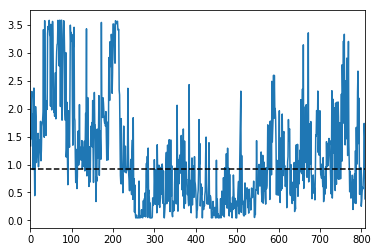

In [14]:
data_GLN4 = dict_of_r4s_df['YOR168W']

print data_GLN4[0].index

#for AA in data_GLN4[0].index:
    
plt.plot(data_GLN4[0].index, data_GLN4[0]['score'])
#plt.axvline(267, linestyle = '--', color='r')
plt.xlim(0,809)

plt.axhline(np.median(data_GLN4[0]['score']), linestyle = '--', color='k')

In [15]:
gln4 = find_variants('YOR168W')

1011


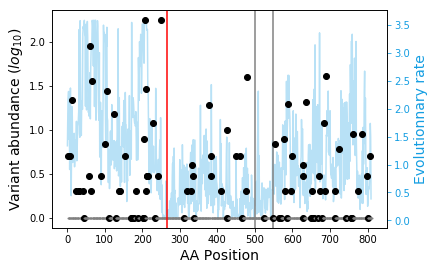

In [21]:
fig, ax1 = plt.subplots(figsize=(6, 4))

variant_count_dict = Counter()

for variant in gln4.keys():
    
    if 'del' in variant:
        
        pos = int(variant.split('del')[0])
        
        variant_count_dict[pos] += gln4[variant]
        
    elif 'ins' in variant:
        
        pos = int(variant.split('ins')[0])
        
        variant_count_dict[pos] += gln4[variant]
        
        
    else:
        pos = int(variant[1:-1])

        variant_count_dict[pos] += gln4[variant]
    
for pos in range(1, len(prot_translation(orf_dict['YOR168W']))+1):
    
    if variant_count_dict[pos] >= 1:
        
        ax1.plot(pos+1, np.log10(variant_count_dict[pos]), 'ko')
        
    else:
    
        ax1.plot(pos+1, variant_count_dict[pos], color='grey', marker = 'o', ms = 1)

        
        

ax1.set_xlabel('AA Position', fontsize = 14)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel(r'Variant abundance ($log_{10}$)', fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(data_GLN4[0].index, data_GLN4[0]['score'], alpha = 0.3, color = '#159EE2')


ax2.set_ylabel('Evolutionnary rate', fontsize = 14, color = '#159EE2')
ax2.tick_params(axis='y',colors = '#159EE2')


ax1.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2
ax1.patch.set_visible(False)

    
#ax1.set_title('YOR168W GLN4')

    
ax1.axvline(267, color = 'red')


plt.axvline(499, color = 'grey')
plt.axvline(548, color = 'grey')

plt.savefig('./gln4_var_evo_rate_v2.svg', format = 'svg', dpi = 300)

In [17]:
rap1 = find_variants('YNL216W')
data_RAP1 = dict_of_r4s_df['YNL216W']
print len(data_RAP1[0])

1011
827


In [18]:
print rap1

Counter({'A535T': 969, 'T93P': 77, 'S263G': 66, 'D241N': 51, 'A632T': 39, '238insNSNS': 34, 'N232H': 33, 'A30G': 33, 'G101A': 27, 'D71N': 21, 'S168P': 17, 'A88D': 15, 'N95K': 14, 'R513K': 13, 'H667Q': 13, 'I146V': 11, 'T75A': 11, 'A627T': 10, 'A12V': 10, 'D452N': 9, 'A102T': 8, 'V67I': 8, 'A354P': 7, 'E170D': 7, 'P107T': 6, 'D238N': 6, 'V104A': 6, 'T112A': 5, 'N331S': 5, 'S660N': 5, 'E793Q': 5, 'N798S': 4, 'T311I': 4, 'D241Y': 4, 'M349I': 4, 'T247R': 4, 'S603G': 4, 'A53S': 4, 'P503S': 4, 'A55G': 4, 'A40G': 4, 'N313S': 3, 'P107R': 3, '238insNS': 3, 'A56T': 3, 'A291P': 3, 'N359I': 3, '619delAAAA': 3, 'T108I': 3, 'E259G': 3, 'G296R': 3, 'E66D': 2, 'N340D': 2, 'V24A': 2, 'D718N': 2, 'G256S': 2, 'D111G': 2, 'D330N': 2, 'S127T': 2, 'V230A': 2, 'P584S': 2, 'S603N': 2, 'G101D': 2, 'Q272H': 2, 'S505N': 2, 'P662H': 2, 'A94V': 2, 'E637K': 2, 'P781S': 2, 'A113T': 2, 'D37N': 2, 'D799A': 2, 'D136Y': 2, 'W787*': 2, 'S237R': 2, 'D310G': 2, 'A626V': 1, 'N685D': 1, 'E66K': 1, 'A137S': 1, 'S122G': 1, 'E1

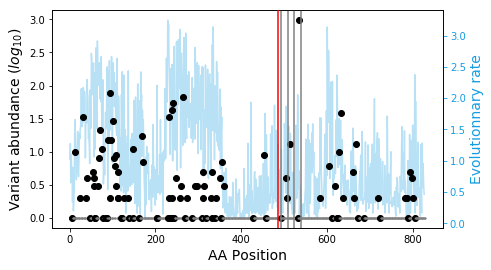

In [19]:
plt.figure(figsize = (7,4))

ax1 = plt.subplot(111)



variant_count_dict = Counter()

for variant in rap1.keys():
    
    if 'del' in variant:
        
        pos = int(variant.split('del')[0])
        
        variant_count_dict[pos] += rap1[variant]
        
    elif 'ins' in variant:
        
        pos = int(variant.split('ins')[0])
        
        variant_count_dict[pos] += rap1[variant]
        
        
    else:
        pos = int(variant[1:-1])

        variant_count_dict[pos] += rap1[variant]
    
for pos in range(1, len(prot_translation(orf_dict['YNL216W']))+1):
    
    if variant_count_dict[pos] >= 1:
        
        plt.plot(pos+1, np.log10(variant_count_dict[pos]), 'ko')
        
    else:
    
        plt.plot(pos+1, variant_count_dict[pos], color='grey', marker = 'o', ms = 1)

        
        

ax1.set_xlabel('AA Position', fontsize = 14)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel(r'Variant abundance ($log_{10}$)', fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(data_RAP1[0].index, data_RAP1[0]['score'], color = '#159EE2' ,alpha = 0.3)

ax2.set_ylabel('Evolutionnary rate', fontsize = 14, color = '#159EE2')
ax2.tick_params(axis='y',colors = '#159EE2')


ax1.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2
ax1.patch.set_visible(False)

ax1.axvline(486, color = 'red', zorder=10.0)


ax1.axvline(523, color='grey')
ax1.axvline(510, color='grey')
ax1.axvline(540, color='grey')
ax1.axvline(493, color='grey')




plt.savefig('./var_evo_rate_RAP1.svg', format = 'svg', dpi = 300)